In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_json("exps.jsonl", lines=True)
print(len(df))
df.head()

32


,id,name,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,9472c0dde6cc6e12523321f03a2196595efd6b7b,still-wens,bdsaglam/musique,answerable,validation,llama-3-70b-tgi,0.0,cte/format-triples-ere-few.txt,cq.txt,manual/cte-triples.json,...,92,627,44.432217,16.673996,13,33.0,41.0,52.0,134,CTE
1,ce2ef0f4b1517fd6b6cf511b0ec08d3493fcb0ba,lardy-roam,bdsaglam/musique,answerable,validation,llama-3-70b-tgi,0.0,cte/format-sro-triples-few.txt,cq.txt,manual/cte-triples.json,...,107,645,46.551938,18.736631,16,34.0,43.0,55.0,176,CTE
2,d56d42f4b2786c9dab8c1b94aaa5de6625183050,cruel-gest,bdsaglam/musique,answerable,validation,llama-3-70b-tgi,0.0,cte/format-triples-few.txt,cq.txt,manual/cte-triples.json,...,99,645,47.153488,18.438407,13,34.0,43.0,56.0,153,CTE
3,d104296612d5b24ef86ee252e959e5f9d89aae08,lucky-lush,bdsaglam/musique,answerable,validation,llama-3-70b-tgi,0.0,cte/format-sro-triples-few.txt,cq.txt,manual/cte-triples.json,...,100,648,46.520062,19.124167,16,34.0,43.0,54.0,176,CTE
4,4e39d84ba5fc317d02d078c4e573bd8169656f06,wiser-sing,bdsaglam/musique,answerable,validation,llama-3-70b-tgi,0.0,cte/format-triples-few.txt,cq.txt,manual/cte-triples.json,...,99,648,47.293210,18.237582,13,35.0,43.0,56.0,153,CTE


In [3]:
param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = [col for col in df.columns if col.startswith("metrics.")]
df.drop(
    columns=[
        "id",
        "params.dataset.path",
        "params.dataset.name",
        "params.dataset.split",
        "params.qa.model",
    ],
    inplace=True,
)

In [4]:
target_param_cols = [
    "params.qa.technique",
    "params.qa.system_prompt",
    "params.qa.few_shot_examples",
    "params.qa.n_shot",
    "params.qa.n_sc",
    "params.qa.temperature",
]
df = df.sort_values(target_param_cols + ["params.run"])
df.reset_index(drop=True, inplace=True)
df.head()

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.run,metrics.exact_match,metrics.f1,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,finer-yobs,0.0,cok/adapted.txt,cq.txt,manual/cok.json,0,1,1,0.617294,0.733218,...,226,650,99.304615,30.971374,24,78.0,95.0,114.00,273,COK
1,gouty-sook,0.0,cok/adapted.txt,cq.txt,manual/cok.json,0,1,2,0.616467,0.730833,...,226,655,98.978626,30.201659,24,78.0,96.0,114.00,298,COK
2,volar-drop,0.5,cok/adapted.txt,cq.txt,manual/cok.json,0,1,1,0.606537,0.725934,...,222,670,100.150746,30.306796,38,79.0,96.0,115.75,322,COK
3,undue-acne,0.5,cok/adapted.txt,cq.txt,manual/cok.json,0,1,2,0.616467,0.734743,...,226,648,100.945988,31.568015,24,80.0,95.0,116.00,230,COK
4,angry-syce,0.0,cok/adapted.txt,cq.txt,manual/cok.json,1,1,1,0.632602,0.745545,...,197,611,94.098200,26.877442,24,75.0,90.0,110.00,224,COK


In [5]:
def remove_ext(filename):
    return filename.split(".", 1)[0]

df["params.qa.system_prompt"] = df["params.qa.system_prompt"].map(remove_ext)
df["params.qa.user_prompt_template"] = df["params.qa.user_prompt_template"].map(remove_ext)
df["params.qa.few_shot_examples"] = df["params.qa.few_shot_examples"].map(remove_ext)

In [6]:
# make temperature 1 decimal
df["params.qa.temperature"] = df["params.qa.temperature"].round(1)

In [7]:
def parse_instruction(row):
    technique = row["params.qa.technique"].lower()
    sp = row["params.qa.system_prompt"].lower().replace(technique + "/", "")
    fs = row["params.qa.few_shot_examples"].lower().replace("/" + technique, "")
    return f"{technique}/{sp}/{fs}"

df["instruction"] = df.apply(parse_instruction, axis=1)

In [8]:
target_param_cols

['params.qa.technique',
 'params.qa.system_prompt',
 'params.qa.few_shot_examples',
 'params.qa.n_shot',
 'params.qa.n_sc',
 'params.qa.temperature']

In [9]:
avg_df = df.groupby(target_param_cols)[metric_cols].max().reset_index()
# find the rows with max f1 score for each technique group
max_f1_rows = avg_df.groupby('params.qa.technique')["metrics.f1"].idxmax()
best_df = avg_df.loc[max_f1_rows, target_param_cols + metric_cols].sort_values('metrics.f1', ascending=False)
best_df

,params.qa.technique,params.qa.system_prompt,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,...,metrics.gen_token_count.success.75%,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max
2,COK,cok/adapted,manual/cok,1,1,0.0,0.635085,0.746846,0.661342,0.774246,...,101.0,197,611,94.644737,27.110588,24,76.0,91.0,110.00,224
11,CTE,cte/format-triples-ere-few,manual/cte-triples,1,1,0.5,0.626396,0.741961,0.654952,0.769527,...,49.0,116,636,46.054839,18.137873,13,34.0,43.0,54.25,139


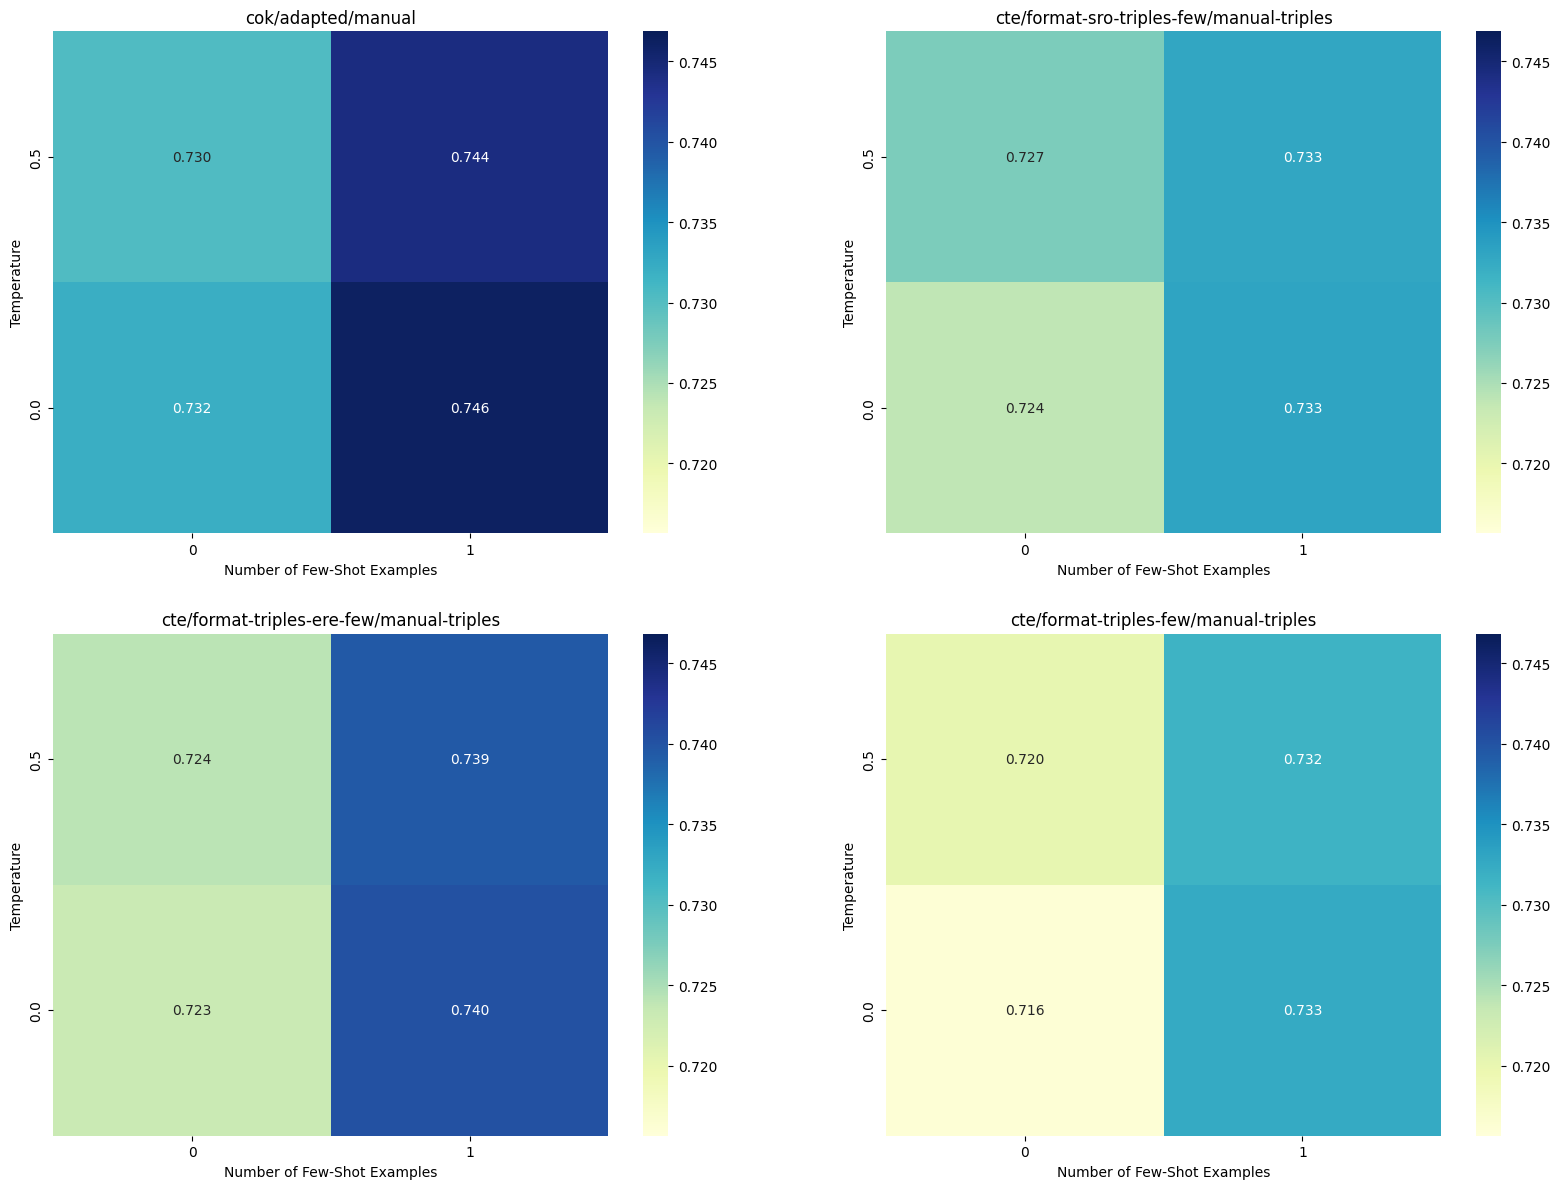

In [13]:
# Example 2: Heatmap of F1 scores based on temperature and number of few-shot examples per technique
instructions = df["instruction"].unique()
n = len(instructions)
n_cols = 2
n_rows = (n + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 6))

vmin = df["metrics.f1"].min()
vmax = df["metrics.f1"].max()

for ax, instruction in zip(axes.flatten(), instructions):
    subset_df = df[df["instruction"] == instruction]
    pivot_table = subset_df.pivot_table(
        values="metrics.f1",
        index="params.qa.temperature",
        columns="params.qa.n_shot",
        aggfunc="mean",
    )
    sns.heatmap(
        pivot_table,
        annot=True,
        fmt=".3f",
        cmap="YlGnBu",
        ax=ax,
        yticklabels=True,
        vmin=vmin,
        vmax=vmax
    )
    ax.set_title(instruction)
    ax.set_xlabel("Number of Few-Shot Examples")
    ax.set_ylabel("Temperature")
    ax.invert_yaxis()

# Remove any empty subplots
for ax in axes.flatten()[n:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.2)  # Add padding between plots
plt.show()
